In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Prepare the data.
cancer = load_breast_cancer()
X = cancer["data"]
y = cancer["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            stratify = y,
                                        random_state = 42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define the black box function to optimize.
def black_box_function(C):                      # <-- this will be replaced by our NN
    # C: SVC hyper parameter to optimize for.
    model = SVC(C = C)
    model.fit(X_train_scaled, y_train)
    y_score = model.decision_function(X_test_scaled)
    f = roc_auc_score(y_test, y_score)
    return f
# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {"C": [0.1, 10]}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = black_box_function,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   |     C     |
-------------------------------------


| 1         | 0.9979    | 9.674     |
| 2         | 0.9975    | 5.518     |
| 3         | 0.9979    | 9.73      |
| 4         | 0.9979    | 7.177     |
| 5         | 0.9979    | 7.008     |
| 6         | 0.9914    | 0.1023    |
| 7         | 0.9981    | 8.506     |
| 8         | 0.9981    | 8.15      |
| 9         | 0.9981    | 8.327     |
| 10        | 0.9981    | 8.8       |
| 11        | 0.9981    | 8.671     |
| 12        | 0.9981    | 7.974     |
| 13        | 0.9979    | 6.273     |
| 14        | 0.9981    | 8.064     |
| 15        | 0.9981    | 8.911     |
Best result: {'C': 8.50571739015795}; f(x) = 0.9981132075471698.


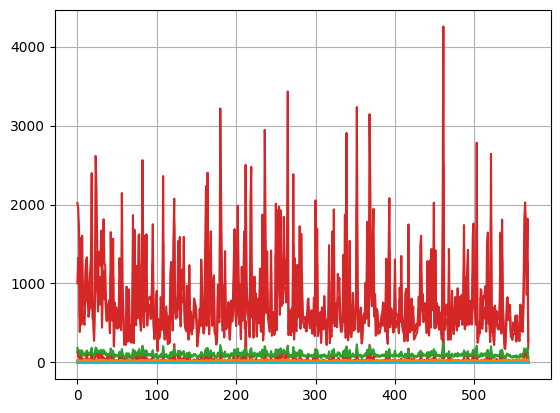

In [6]:
plt.figure()
for i in range(X.shape[1]):
    plt.plot(X[:,i], label=str(i))
plt.grid(True)

Example of Bayesian optimization with prey and predator

In [7]:
# Prepare the data.
data = np.load('../data/prey_predator_1.npy')
N = data.shape[0]
x_hat = np.zeros((N+1,2))
x_hat[9,:] = data[9,:]
for i in range(10,N-1):
    X = data[:i,:]
    y = data[1:i+1,:]
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            random_state = 42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Define the black box function to optimize.
    def black_box_function(C):
        # C: SVC hyper parameter to optimize for.
        model = SVC(C = C)
        model.fit(X_train_scaled, y_train)
        y_score = model.decision_function(X_test_scaled)
        f = roc_auc_score(y_test, y_score)
        return f
    # Set range of C to optimize for.
    # bayes_opt requires this to be a dictionary.
    pbounds = {"C": [0.1, 10]}
    # Create a BayesianOptimization optimizer,
    # and optimize the given black_box_function.
    optimizer = BayesianOptimization(f = black_box_function,
                                    pbounds = pbounds, verbose = 2,
                                    random_state = 4)
    optimizer.maximize(init_points = 5, n_iter = 10)
    print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))
    C_hat = optimizer.max["params"]
    x_hat[i] = black_box_function(C_hat)(x_hat[i-1])

T = 200
dt = T/N
tt=np.arange(0,T+dt,dt)
x_ex = data

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')


|   iter    |  target   |     C     |
-------------------------------------


ValueError: y should be a 1d array, got an array of shape (6, 2) instead.

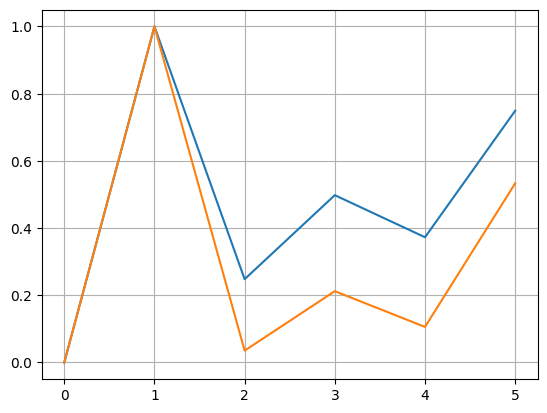

In [12]:
plt.figure()
for i in range(X_train_scaled.shape[1]):
    plt.plot(X_train_scaled[:,i])
plt.grid(True)